# CSO QaQc: Zero Depth Value Exploration

We know that `Zero` depth values are worth keeping and valuable pieces of data. However there seems to be some inconsistencies when it comes to the filtering of these values, we will explore this in this Notebook

In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Import necessary packages, may need more or less as I go.

In [2]:
CSO_gdf = gpd.read_file('CSOgeodata.txt')
CSO_gdf['timestamp'] = pd.to_datetime(CSO_gdf.timestamp)

In [3]:
CSO_gdf['flags'] = False
CSO_gdf

,id,author,depth,source,timestamp,elevation,geometry,flags
0,4J5z5w7h,camila chamizo,150.0,SnowPilot,2021-06-28 20:15:00+00:00,1881.618530,POINT (-71.56655 -41.10209),False
1,2C8R7ehK,camila chamizo,150.0,SnowPilot,2021-06-28 18:15:00+00:00,1881.618530,POINT (-71.56655 -41.10209),False
2,a3a3VCXY,juan manuel raselli,155.0,SnowPilot,2021-06-26 20:00:00+00:00,1577.167603,POINT (-72.93703 -49.07451),False
3,ImH60r2U,John Soltys,90.0,MountainHub,2021-06-26 15:12:30.931999+00:00,1585.094727,POINT (-121.40983 47.45218),False
4,mebZPRGY,Roberto indio Treu,400.0,SnowPilot,2021-06-25 15:00:00+00:00,1568.316284,POINT (-72.93789 -49.07159),False
...,...,...,...,...,...,...,...,...
30492,H2E/jXmC,aask@nve,18.0,regObs,1975-03-04 16:30:00+00:00,851.000000,POINT (8.94487 61.78813),False
30493,caoWAbeB,aask@nve,49.0,regObs,1974-03-08 15:50:00+00:00,984.000000,POINT (8.74345 61.49456),False
30494,f63KW/A1,aask@nve,32.0,regObs,1974-03-08 12:20:00+00:00,851.000000,POINT (8.94487 61.78813),False
30495,m+lrqT6a,aask@nve,9.0,regObs,1974-03-08 10:40:00+00:00,362.000000,POINT (8.94222 61.85313),False


In [4]:
ZERO = 0
CSO_gdf.loc[CSO_gdf['depth'] <= ZERO, 'flags'] = True
CSO_noZeros = (CSO_gdf.loc[CSO_gdf['flags'] == False])
CSO_zeros = CSO_gdf.loc[CSO_gdf['flags'] == True]
CSO_zeros

,id,author,depth,source,timestamp,elevation,geometry,flags
17455,j/m7oRHe,Bart Wills,0.0,MountainHub,2018-11-17 22:03:47.806000+00:00,1998.644653,POINT (-121.73205 44.08389),True
17518,xStFQaxG,Ben Pritchett,0.0,SnowPilot,2018-11-07 23:00:00+00:00,3677.466797,POINT (-106.56653 39.07887),True
17539,mqTo9/Wd,Chris McCollister,0.0,SnowPilot,2018-11-01 19:15:00+00:00,2793.014893,POINT (-110.95248 43.47822),True
17573,iDn+SCXH,Finn Wright,0.0,SnowPilot,2018-10-04 18:00:00+00:00,1692.729980,POINT (175.53269 -39.30351),True
17605,+8gZ8XUU,Remarks Snow Safety,0.0,SnowPilot,2018-08-27 18:30:00+00:00,1918.912598,POINT (168.82539 -45.05029),True
...,...,...,...,...,...,...,...,...
24359,1RVdBDqO,David Brown,0.0,SnowPilot,2016-12-11 22:42:44+00:00,2844.528320,POINT (-111.44531 45.27574),True
24387,bV2w6An3,Kory Davis,0.0,SnowPilot,2016-12-10 02:32:12+00:00,2207.748535,POINT (-111.94193 41.37743),True
24388,EYVAHfT8,Burket Kniveton,0.0,SnowPilot,2016-12-10 01:33:22+00:00,1853.509766,POINT (-113.67233 48.27228),True
24392,L59wWjgw,Mark Staples,0.0,SnowPilot,2016-12-09 23:20:32+00:00,2666.063965,POINT (-111.67196 40.66272),True


In [5]:
CSO_zeros[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
MountainHub,24
SnowPilot,160


### SnowPilot Zeros

* These have been discussed to be mostly unintentional due to some problem when compiling the data from SnowPilot as it has many more fields to fill in when compared to thing such as MountainHub. We need to reach out and figure out the procedure/see if these are intentional.

### MountainHub Zeros

* These are valuable pieces of data however there is only 24 pieces of data, which seems rather low when considering the amount of `Zeros` that people have said they have submitted.

In [6]:
CSO_zeros.loc[CSO_zeros['source'] == "MountainHub"]

,id,author,depth,source,timestamp,elevation,geometry,flags
17455,j/m7oRHe,Bart Wills,0.0,MountainHub,2018-11-17 22:03:47.806000+00:00,1998.644653,POINT (-121.73205 44.08389),True
17736,jcnILKo9,Emily Baker,0.0,MountainHub,2018-05-22 22:49:53.007999+00:00,363.361664,POINT (-148.89407 60.37059),True
17772,FOBtszAf,Mara Gans,0.0,MountainHub,2018-05-07 20:11:37.395000+00:00,1647.126465,POINT (-108.73128 42.83333),True
17846,W77sQPH6,Snow Bloom,0.0,MountainHub,2018-04-24 02:30:14.968000+00:00,1991.273438,POINT (-110.76322 43.47957),True
19683,rMtxihZp,"BSA troop 115 Snoqualmie, WA",0.0,MountainHub,2018-02-12 16:25:26.400000+00:00,700.134460,POINT (-116.81215 47.77363),True
19814,WizcsgaN,"BSA troop 115 Snoqualmie, WA",0.0,MountainHub,2018-02-07 19:07:42.874001+00:00,406.043060,POINT (-122.87883 42.37123),True
20556,xt6cnm1X,Aaron Miller,0.0,MountainHub,2018-01-10 02:45:40.620998+00:00,71.103752,POINT (-122.48097 48.75071),True
20759,VdZRlPAP,Karri Sicard,0.0,MountainHub,2018-01-02 00:16:34.530998+00:00,912.926453,POINT (-121.14116 44.36943),True
20936,bs4/zBDi,Shaun Wicen,0.0,MountainHub,2017-12-24 06:49:17.403999+00:00,3157.386719,POINT (-106.83651 37.48912),True
21133,mUBi94GT,Geo Jord,0.0,MountainHub,2017-12-16 11:27:13.022000+00:00,1120.372925,POINT (23.47350 41.82079),True


### Interesting note

Dave had mentioned recording `Zero` values from his office on Mountainhub but none of them are present?

In [7]:
CSO_DAVE = CSO_gdf.loc[CSO_gdf['author'] == "David Hill"]
CSO_DAVE

,id,author,depth,source,timestamp,elevation,geometry,flags
109,byeFFRIW,David Hill,160.00,MountainHub,2021-05-11 18:44:14.283000+00:00,2577.653564,POINT (-122.14950 43.52067),False
1611,eWcybA8B,David Hill,280.00,MountainHub,2021-03-13 16:16:21.386000+00:00,2108.131836,POINT (-122.08692 43.14962),False
1612,mZCKCItp,David Hill,225.00,MountainHub,2021-03-13 15:24:32.368999+00:00,1977.794678,POINT (-122.10008 43.14938),False
2251,kljNzl3E,David Hill,170.00,MountainHub,2021-02-28 22:37:50.908001+00:00,2292.394287,POINT (-122.23240 41.36627),False
2310,hVe8P1EP,David Hill,183.00,MountainHub,2021-02-27 22:52:40.257999+00:00,2146.215088,POINT (-122.23967 41.35884),False
...,...,...,...,...,...,...,...,...
21542,7BB+SBZV,David Hill,35.56,MountainHub,2017-11-22 20:00:00+00:00,1530.093140,POINT (-121.88220 44.40199),False
21697,H1fgS9Sa,David Hill,55.88,MountainHub,2017-11-15 20:00:00+00:00,1530.046509,POINT (-121.88218 44.40199),False
21766,2GZ+o/nC,David Hill,46.00,MountainHub,2017-11-08 20:00:00+00:00,1530.113159,POINT (-121.88215 44.40202),False
21832,X9x9gJfK,David Hill,2.54,MountainHub,2017-10-22 19:00:00+00:00,1530.700195,POINT (-121.88225 44.40207),False


In [8]:
CSO_DAVE_zeros = CSO_DAVE.loc[CSO_DAVE['flags'] == True]
CSO_DAVE_zeros

,id,author,depth,source,timestamp,elevation,geometry,flags


We can see that theres still no `Zero` depth values for Dave even though he had said that he had recorded them. This will take some asking around as I could be wrong in this assumption.

### Histogram for Elevation of CSO dataset

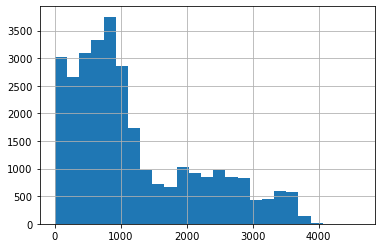

In [9]:
histogram_gdf = CSO_gdf['elevation'].hist(bins = 25)

### Histogram for Elevation of CSO zero values

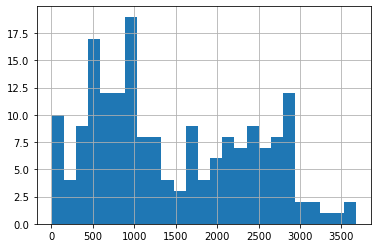

In [10]:
histogram_flag = CSO_zeros['elevation'].hist(bins = 25)

### Histogram for CSO data depth values

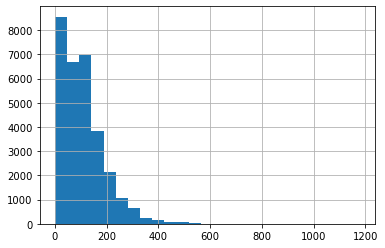

In [11]:
histogram_depth = CSO_gdf['depth'].hist(bins = 25)

Looking at the Depth values on the histogram we can see that most depth observations are under 200 cm. With this in mind we can possible remove bad depth observations by flagging values that are unreasonably low.

## Flagging values for depth observations that are unreasonably low.

This is a somewhat arbitrary test and may need some fleshing out in terms of numbers.

In [12]:
LOW = 3
CSO_gdf_LOW = gpd.read_file('CSOgeodata.txt')
CSO_gdf_LOW.loc[CSO_gdf_LOW['depth'] <= LOW, 'flags'] = True
CSO_gdf_LOW.loc[CSO_gdf_LOW['depth'] == ZERO, 'flags'] = False
CSO_LOW = CSO_gdf_LOW.loc[CSO_gdf_LOW['flags'] == True]
CSO_LOW

,id,author,depth,source,timestamp,elevation,geometry,flags
42,VwYCh2XS,Larry Risch,2.54,MountainHub,2021-05-26T20:26:12.713000+00:00,1261.893921,POINT (-121.68420 45.28195),True
255,9xvVIxIH,Gøran@ObsKorps,3.00,regObs,2021-05-01T08:18:38+00:00,14.836278,POINT (13.55263 66.30377),True
298,q6aoOr0u,KolbjørnT,2.00,regObs,2021-04-28T19:00:00+00:00,679.705933,POINT (6.16765 58.79969),True
300,pgc+w72B,KolbjørnT,2.00,regObs,2021-04-28T18:00:00+00:00,677.005249,POINT (6.19845 58.79343),True
301,tbpvzjzv,KolbjørnT,2.00,regObs,2021-04-28T17:00:00+00:00,653.231384,POINT (6.18549 58.78704),True
...,...,...,...,...,...,...,...,...
30426,4JWPjK61,aask@nve,3.00,regObs,1988-04-06T12:00:00+00:00,175.000000,POINT (11.07045 60.40347),True
30460,PqiVIbE2,aask@nve,2.00,regObs,1983-03-01T12:00:00+00:00,123.000000,POINT (11.22135 60.55980),True
30464,UuOQ9zdD,aask@nve,3.00,regObs,1982-02-02T12:00:00+00:00,175.000000,POINT (11.07045 60.40347),True
30481,b4wCR/FM,aask@nve,3.00,regObs,1977-04-28T12:00:00+00:00,175.000000,POINT (11.07045 60.40347),True


In [13]:
CSO_LOW[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
MountainHub,48
regObs,1564


In [14]:
CSO_LOW.loc[CSO_LOW['source'] == "MountainHub"]

,id,author,depth,source,timestamp,elevation,geometry,flags
42,VwYCh2XS,Larry Risch,2.54,MountainHub,2021-05-26T20:26:12.713000+00:00,1261.893921,POINT (-121.68420 45.28195),True
422,hrm/IK67,Georgia Murray,1.00,MountainHub,2021-04-22T16:31:33.514999+00:00,519.128174,POINT (-71.50012 43.93511),True
1567,LusYelIS,Benjamin Hatchett,2.00,MountainHub,2021-03-14T19:42:10.664000+00:00,1920.681519,POINT (-120.07238 38.93361),True
1785,WPoEz/cf,Mikey Johnson,3.00,MountainHub,2021-03-10T16:07:18.207001+00:00,1386.576416,POINT (-119.81387 39.53834),True
3065,IZVGp62q,Phillip Raymond Wilson,2.54,MountainHub,2021-02-15T03:25:17.382000+00:00,679.434082,POINT (-145.85868 63.51329),True
3740,v3GzyEuO,Colin R. Meyer,1.00,MountainHub,2021-02-06T13:50:17.253000+00:00,856.094604,POINT (-71.91417 43.64953),True
3913,hZotzJ4M,David Hill,2.00,MountainHub,2021-02-03T21:36:26.136000+00:00,392.987671,POINT (-123.31579 44.68710),True
4542,jtZMLkT8,Kieran Ahern,2.54,MountainHub,2021-01-23T19:46:53.092999+00:00,155.034439,POINT (-72.26283 43.72270),True
4601,wXOxgyQK,Kieran Ahern,3.00,MountainHub,2021-01-22T16:05:06.791000+00:00,152.596680,POINT (-72.29595 43.70219),True
5390,utah5zO/,Ronald Fleshman,2.54,MountainHub,2021-01-09T16:51:17.771000+00:00,105.109734,POINT (-73.89610 42.74802),True


I think using an unreasonably low check seems to be a bit unecessary as it seems that many of our own team members are recording low depth values, so the authenticity of low values seems fairly strong.

## How Impactful Are Zero Values?

Here is where I'll explore how much impact `Zero` depth values have on things such as discriptive statistics.

In [15]:
# Here is the mean depth value of the CSO data.
CSO_mean = CSO_gdf['depth'].mean()
CSO_mean

105.02891555345208

In [16]:
# Here is the mean now with zero values excluded from the data.
CSO_meanNoZero = CSO_noZeros['depth'].mean()
CSO_meanNoZero

105.66644138269483

Interestingly, they don't actually have that much of an effect on the data set when looked as a WHOLE. This makes sense as they make up a small amount of the data.

## Domain Specific Zero Depth Exploration

Now we will be looking at a region where `Zero` depth values actually have a noticeable impact on the data. This region will be California as defined by `CSO_CA`.

In [17]:
CSO_CA = gpd.read_file('CSO_CA')
CSO_gdf['timestamp'] = pd.to_datetime(CSO_gdf.timestamp)

In [18]:
CSO_CA['flags'] = False
CSO_CA

,id,author,depth,source,timestamp,elevation,geometry,flags
0,qi3PPSnQ,Brandon Schwartz,234.000000,SnowPilot,2017-01-02T23:43:42+00:00,2414.250977,POINT (-120.35359 39.36812),False
1,2ZNehL12,Andy Anderson,170.000000,SnowPilot,2017-01-05T23:15:22+00:00,2204.346436,POINT (-120.23536 39.22963),False
2,/c2MfVDw,Andy Anderson,212.000000,SnowPilot,2017-01-07T03:30:39+00:00,2453.741699,POINT (-120.36517 39.35684),False
3,agjWJrxV,Brandon Schwartz,205.000000,SnowPilot,2017-01-11T23:58:35+00:00,2092.592285,POINT (-120.29299 39.34429),False
4,0nxaaHLX,Andy Anderson,505.000000,SnowPilot,2017-01-13T01:57:59+00:00,2424.332275,POINT (-120.25981 39.23891),False
...,...,...,...,...,...,...,...,...
412,MRe9TADy,Yunqing Cao,368.999986,MountainHub,2019-04-21T00:23:11.476000+00:00,2248.087646,POINT (-120.21737 38.62686),False
413,s9m3kkTq,Yunqing Cao,370.999986,MountainHub,2019-04-21T00:25:31.330000+00:00,2247.337402,POINT (-120.21720 38.62713),False
414,3muH06T8,Alexander Wong,200.000000,MountainHub,2019-05-11T22:52:38.848000+00:00,2249.148193,POINT (-120.21753 38.62687),False
415,4pmY8RAI,Alexander Wong,217.000000,MountainHub,2019-05-11T22:54:49.887001+00:00,2249.259766,POINT (-120.21756 38.62685),False


In [19]:
CSO_CA.loc[CSO_CA['depth'] <= ZERO, 'flags'] = True
CSO_noCA = (CSO_CA.loc[CSO_CA['flags'] == False])
CSO_CAzeros = CSO_CA.loc[CSO_CA['flags'] == True]
CSO_CAzeros

,id,author,depth,source,timestamp,elevation,geometry,flags
7,Z95qZpSQ,Michael McCarthy,0.0,SnowPilot,2017-01-17T02:03:42+00:00,2441.649414,POINT (-120.01186 38.48720),True
13,RCvcmg6A,Steve Reynaud,0.0,SnowPilot,2017-01-25T21:53:45+00:00,2637.030518,POINT (-120.12468 38.97563),True
32,9IB+e8Cr,Brandon Schwartz,0.0,SnowPilot,2017-02-13T01:55:16+00:00,2256.924805,POINT (-120.04731 38.48369),True
33,gQLOtG8l,Brandon Schwartz,0.0,SnowPilot,2017-02-14T00:06:30+00:00,2552.545166,POINT (-120.01146 38.49844),True
34,uGZnzVXZ,Brandon Schwartz,0.0,SnowPilot,2017-02-15T22:26:48+00:00,2426.161377,POINT (-120.13632 38.99072),True
42,0y9qanTS,Milan Korsos,0.0,SnowPilot,2017-02-24T02:32:26+00:00,2253.379639,POINT (-120.33353 39.33458),True
44,LXz2Z1iL,Nick Jezienicki,0.0,SnowPilot,2017-02-24T05:14:07+00:00,2302.860596,POINT (-120.33946 39.33592),True
46,ibmPe+iv,Ivan McGurk,0.0,SnowPilot,2017-02-25T01:21:53+00:00,2405.705322,POINT (-120.36498 39.34933),True
47,huHTvcIh,Devin Triantos,0.0,SnowPilot,2017-02-25T02:26:15+00:00,2427.442383,POINT (-120.36673 39.35102),True
48,Hitvic4X,Nick Jezienicki,0.0,SnowPilot,2017-02-25T04:18:16+00:00,2411.693604,POINT (-120.36495 39.34977),True


In [20]:
CSO_CAzeros[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
SnowPilot,17


In [21]:
CSO_meanCA = CSO_CA['depth'].mean()
CSO_meanCA

155.31314122126275

In [22]:
CSO_noZeroMean = CSO_noCA['depth'].mean()
CSO_noZeroMean

161.9139497231664

<AxesSubplot:>

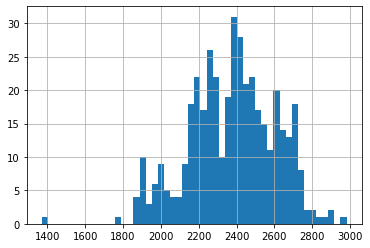

In [23]:
histogram_CA = CSO_CA['elevation'].hist(bins = 50)
histogram_CA

<AxesSubplot:>

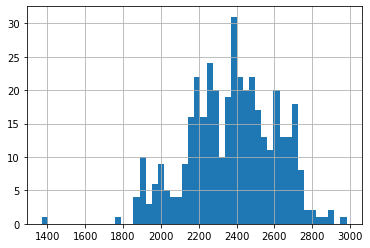

In [24]:
histogram_CAnoZeros = CSO_noCA['elevation'].hist(bins = 50)
histogram_CAnoZeros

The zeros are actually very impactful in this region as the amount of `Zero` depth values is relatively higher than most regions. 

From all of this exploration I think it highlights an important aspect that I have not mentioned. The effect that `Zero` depth values have is very reliant on the amount of data in a given region. If we look at California as defined by `CSO_CA` we can see that Zeros are actually very impactful as that region has a rather large amount of these values when compared to most. These also all seem a bit unintentional as they come from SnowPilot. Also another interesting fact about those SnowPilot `Zero` depth values is that they ALL come from 2017. So I wonder if there was some sort of miscommunication or a specific part of 2017 that lead to this possible error.